In [1]:
import json
import time
import pandas as pd
from collections import Counter
import torch

import pandas as pd
import numpy as np
import nltk
import string
import re
import emoji
import torch
import json
import time
import numpy as np

from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch

#import April12.ipynb
#%store -r icd_grouped 
import statsmodels.api as sm
from patsy import dmatrices 

# model selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import seaborn



[]


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [4]:
# Basic data files and paths
TOP_100_PATH = '../data/popular_100_memes.csv'
TOP_100 = pd.read_csv(TOP_100_PATH, encoding = "ISO-8859-1")
DATA_PATH = '../data/memes/'

STATS_PATH = '../data/statistics.json'  #statistics.json
with open(STATS_PATH, 'r') as f:
    STATS = json.load(f)
print(TOP_100.head())

          ID                   Name  \
0  112126428   Distracted Boyfriend   
1     438680  Batman Slapping Robin   
2   87743020            Two Buttons   
3  181913649    Drake Hotline Bling   
4      61579    One Does Not Simply   

                                     Alternate Names  
0  distracted bf, guy checking out another girl, ...  
1                                                NaN  
2  2 red buttons, choice button, which button, da...  
3  drakeposting, drakepost, drake hotline approve...  
4  one does not simply walk into morder, lord of ...  


In [5]:
memes_count = Counter(STATS['memes'])
print(len(STATS['memes']))
for f, c in memes_count.most_common():
    print(f)
    #print(f, c)

99
Bad-Luck-Brian.json
One-Does-Not-Simply.json
Philosoraptor.json
Boardroom-Meeting-Suggestion.json
Futurama-Fry.json
First-World-Problems.json
The-Most-Interesting-Man-In-The-World.json
Batman-Slapping-Robin.json
Bad-Pun-Dog.json
X-X-Everywhere.json
Expanding-Brain.json
Two-Buttons.json
But-Thats-None-Of-My-Business.json
Ancient-Aliens.json
Creepy-Condescending-Wonka.json
Grumpy-Cat.json
Y-U-No.json
The-Rock-Driving.json
That-Would-Be-Great.json
Waiting-Skeleton.json
Change-My-Mind.json
Leonardo-Dicaprio-Cheers.json
10-Guy.json
Captain-Picard-Facepalm.json
Matrix-Morpheus.json
Third-World-Skeptical-Kid.json
Confession-Bear.json
Am-I-The-Only-One-Around-Here.json
Success-Kid.json
Hide-the-Pain-Harold.json
Roll-Safe-Think-About-It.json
Evil-Toddler.json
Awkward-Moment-Sealion.json
Face-You-Make-Robert-Downey-Jr.json
Mocking-Spongebob.json
Disaster-Girl.json
Blank-Nut-Button.json
Dont-You-Squidward.json
Inhaling-Seagull.json
Back-In-My-Day.json
Grandma-Finds-The-Internet.json
Brace-Your

In [6]:
memes = []
for f, c in memes_count.most_common():
    memes.append(f)
    
selected_memes = memes

def open_data(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

memes_data = [open_data(DATA_PATH + meme) for meme in selected_memes]   

In [7]:
# Preprocessing data for modelling
from nltk import sent_tokenize, word_tokenize
from gensim.models import Word2Vec

In [8]:
def parse_text(text):
    text = text.lower().strip()
    return word_tokenize(text)

def parse_blocks(blocks):
    result = []
    for i,b in enumerate(blocks):
        result.append(parse_text(b))
#         if i < len(blocks) - 1:
#             result.extend('|')
    return result

ex = parse_blocks(memes_data[0][0]['boxes'])
print(ex)
model = Word2Vec(ex, min_count=1)
print(model)

[['gets', 'covid', '19', 'and', 'recovers'], ['dies', 'from', 'complications', 'related', 'to', 'the', 'common', 'cold', '.']]
Word2Vec(vocab=14, size=100, alpha=0.025)


# Most Frequent Words

In [16]:
#each format is a element in array 
#then concetenate all box strings of a meme format, amke it into a single stringle 

allwords_memeformat = []
#onestring_memeformat = ''

for i in range(len(memes_data)):
    eachformat_string = ''
    
    for ele in memes_data[i]:
        #print("This is ele: " + str(ele))
        box = ele['boxes']
        
        string = ' '.join(box)
        eachformat_string = eachformat_string + ' ' + string
        #eachformat_string = eachformat_string + string
    
    allwords_memeformat.append(eachformat_string)

In [17]:
#allwords_memeformat[1]

In [18]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [19]:
for i in range(len(allwords_memeformat)):
    print('\n')
    print("Meme format: " + str(i))
    common_words = get_top_n_words([allwords_memeformat[i]], 40) #input should be an array not a string
    for word, freq in common_words:
        print(word, freq)



Meme format: 0
gets 8566
his 5405
by 2734
him 2609
he 2581
goes 2194
with 2161
up 1903
out 1871
meme 1730
has 1654
finally 1416
you 1371
get 1352
from 1340
an 1293
first 1282
as 1192
makes 1166
day 1116
one 1059
dies 987
finds 986
girl 941
when 918
no 914
into 862
my 818
she 788
wins 784
life 777
luck 766
buys 762
can 760
still 759
new 752
got 751
school 747
doesn 735
time 722


Meme format: 1
not 21291
one 21100
simply 19688
does 19227
you 3350
without 2198
meme 1966
get 1685
make 1617
this 1512
with 1445
have 1196
your 1156
when 1084
an 992
their 979
my 955
bruh 955
like 952
do 951
just 872
they 850
memes 847
go 808
me 802
eat 764
say 716
up 703
out 651
if 638
how 600
what 582
can 576
about 572
no 568
from 552
into 550
use 549
watch 517
play 510


Meme format: 2
if 12450
you 5740
why 3364
do 2762
what 2690
does 2650
they 2499
would 2132
then 1772
have 1762
we 1656
people 1646
can 1641
when 1603
or 1532
how 1521
make 1438
an 1275
mean 1184
there 1152
your 1141
with 1106
called 1088


my 1917
you 1830
like 1252
me 968
if 734
when 692
just 668
so 650
have 625
can 591
they 577
what 562
but 539
your 535
with 505
how 450
get 430
do 429
said 415
dude 407
don 398
not 386
out 371
people 370
he 365
up 358
no 337
high 329
know 327
an 322
got 307
why 295
we 287
one 283
this 278
day 269
time 260
from 246
there 243
told 240


Meme format: 23
you 3555
when 3344
your 1266
my 1117
they 760
me 673
someone 610
have 569
just 545
people 545
but 529
not 517
with 501
meme 461
this 421
get 421
can 420
so 392
what 391
why 389
out 374
about 371
he 364
one 360
says 354
don 350
make 350
no 350
up 346
an 346
do 343
how 342
like 316
re 310
if 306
we 300
see 293
moment 273
she 271
realize 269


Meme format: 24
you 9833
if 7379
what 7208
told 6902
your 966
not 826
have 553
can 552
just 505
there 406
don 392
my 391
with 390
people 382
this 377
as 340
no 322
they 317
meme 315
will 308
because 295
an 276
doesn 272
make 272
only 266
when 265
more 256
than 256
like 254
about 253
re 252
we 249
or 249


their 2772
loses 2555
minds 2280
an 2070
eye 1811
bats 1741
one 1600
everyone 1515
everybody 1445
no 1308
nobody 1098
you 1087
but 597
when 580
people 527
mind 499
say 377
make 371
about 364
they 348
your 328
meme 304
with 301
someone 288
my 283
get 263
cares 262
gets 238
black 237
says 231
out 231
up 229
me 216
guy 211
if 207
not 199
tell 197
just 195
man 195
like 195


Meme format: 46
just 1351
wait 1238
ll 979
waiting 888
here 847
my 601
you 555
when 531
me 505
until 430
later 379
still 322
this 298
your 295
years 267
after 244
one 243
meme 243
get 226
ill 225
will 208
like 204
more 187
internet 182
before 178
oh 174
game 160
out 157
memes 154
up 151
update 148
look 144
with 140
computer 137
have 126
now 126
new 124
load 120
back 119
watching 118


Meme format: 47
you 1381
your 660
this 457
will 337
no 288
not 282
scroll 273
truth 244
gay 236
fortnite 224
life 202
me 201
have 198
get 171
ur 167
years 160
meme 156
memes 154
mom 153
never 152
than 146
15 145
better 139
just 136
wasted

get 53
ask 52
up 51
than 50
says 50


Meme format: 71
got 2052
time 2015
nobody 1849
ain 1322
aint 620
dat 372
you 262
fo 171
my 152
no 130
your 129
when 108
meme 103
memes 100
me 94
have 86
get 67
make 66
homework 65
do 59
with 57
not 53
out 50
up 50
like 49
school 47
go 47
but 47
an 46
this 45
one 44
trump 44
day 43
body 43
people 41
work 41
waiting 40
about 39
what 39
want 38


Meme format: 72
me 1142
you 857
your 409
my 383
should 251
do 249
am 220
have 211
no 190
get 161
but 160
kermit 151
go 145
this 143
just 142
when 136
don 136
also 127
father 125
make 124
what 124
not 120
we 117
memes 110
with 110
inner 105
who 102
can 102
up 96
them 96
her 96
one 95
will 94
out 91
need 89
him 88
dark 87
so 87
want 85
side 83


Meme format: 73
you 609
when 586
this 531
your 328
my 317
me 174
no 105
someone 103
sparta 102
we 100
not 98
out 85
what 83
like 81
get 81
last 78
have 78
one 69
do 68
who 66
with 64
how 64
but 61
don 57
face 55
up 54
if 54
will 53
they 50
there 49
just 46
make 43
can 4

In [20]:
#vec.vocabulary_.items()

In [21]:
#stop_words = text.ENGLISH_STOP_WORDS.union(punc)
#stop_words

In [22]:
len(allwords_memeformat)

99

In [23]:
type(allwords_memeformat[0])

str

# Kmeans With Spacy Word Embedding

In [12]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]
model = Word2Vec(sentences, min_count=1)

In [13]:
model

In [15]:
print (model.similarity('this', 'is'))
print (model.similarity('post', 'book'))

0.061110277
-0.095354676


/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [17]:
#To get vocabulary or the number of words in vocabulary:
print(list(model.wv.vocab))

['this', 'is', 'the', 'good', 'machine', 'learning', 'book', 'another', 'one', 'more', 'new', 'post', 'about', 'and', 'last']


In [19]:
X = model[model.wv.vocab]

/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [21]:
from sklearn import cluster
from sklearn import metrics
NUM_CLUSTERS = 6
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[2 5 0 3 1 3 1 5 3 2 1 4 1 1 1]
Centroids data
[[-3.62467300e-03 -3.06254043e-03  4.04781243e-03  4.39362309e-04
   1.11347064e-04  3.44986282e-03  3.48276575e-03 -3.68812284e-03
   3.03765340e-03  1.20003568e-03  4.06470383e-03 -4.41909069e-03
   6.02892367e-04 -3.81990476e-03  2.11564684e-03  3.41919600e-04
  -2.77221948e-03 -2.36658100e-03 -9.26207867e-05  3.78405070e-03
  -1.87803444e-03  4.20384947e-03  3.67440330e-03  3.05798184e-03
   4.34613461e-03  9.65451822e-04 -2.36281683e-03  3.22172698e-03
  -2.48100352e-03  4.65687085e-03 -9.11324751e-04 -2.01734016e-03
   2.56824680e-03  4.97582881e-03  2.17225589e-03  4.39619320e-03
  -1.37767207e-03 -4.97536501e-03  1.23344851e-03 -3.54671152e-03
   1.82322925e-03 -4.18756763e-03 -1.92023127e-03 -2.07109726e-03
  -2.80198234e-04  4.29166527e-03  4.11602901e-03 -4.18933108e-03
  -3.27471038e-03  8.05193617e-04  2.43107369e-03 -4.96951863e-03
   7.69408827e-04  2.98627629e-03  6.32886193e-04  3.215788

# kmeans demo 3 coded kmeans
https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [180]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = allwords_memeformat
# new stop word using max df, min df
#Eliminating words that appeared in less than 2 meme formats:
#ignore words appeared in 95% of the documents as they are too common

#tf_idf_vectorizor = TfidfVectorizer(stop_words=["you", "me", "my", "your","my", "all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )

tf_idf_vectorizor = TfidfVectorizer(max_df=0.90, min_df=2)  #not including fortnite and covid
#tf_idf_vectorizor = TfidfVectorizer(max_df=0.95, min_df=2)  #including fortnite and covid

tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()


In [182]:
len(tf_idf_array[0])

48583

In [183]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 1000):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.

        Parameters
        ----------
        data: array or matrix, number_rows, number_features

        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster

        """

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)

        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

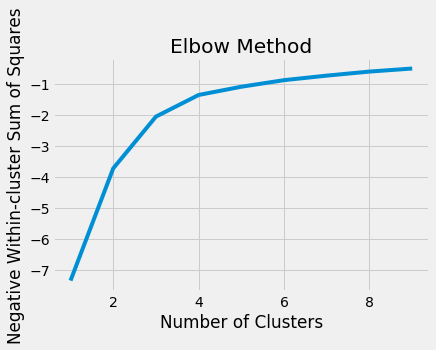

In [184]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

#elbow method 
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 1000) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Negative Within-cluster Sum of Squares')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


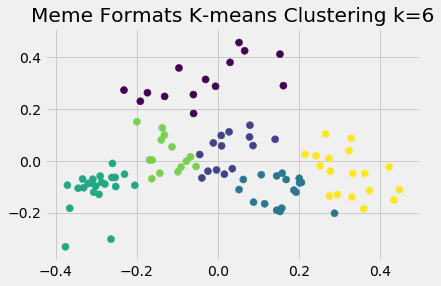

In [185]:
#k=6
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(6, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=6')
#plt.ylabel("TFIDF Score")
#plt.xlabel("Words")
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


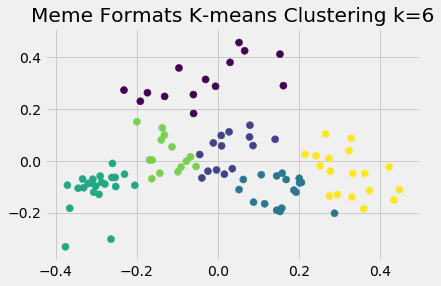

In [186]:
#k=6
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(6, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.title('Meme Formats K-means Clustering k=6')
#plt.ylabel("TFIDF Score")
#plt.xlabel("Words")
plt.show()
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [187]:
predicted_values

array([2, 3, 5, 1, 5, 5, 2, 4, 5, 3, 0, 0, 3, 3, 5, 2, 5, 5, 5, 3, 0, 3,
       5, 5, 5, 5, 5, 2, 2, 5, 5, 2, 2, 5, 1, 2, 0, 3, 3, 2, 2, 3, 5, 5,
       1, 3, 3, 4, 0, 1, 2, 2, 1, 1, 2, 3, 1, 0, 0, 1, 4, 2, 3, 4, 1, 0,
       0, 3, 2, 1, 3, 3, 1, 4, 1, 3, 2, 4, 4, 1, 3, 3, 3, 4, 1, 3, 0, 2,
       4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 3])

In [188]:
memes_count.most_common()[0][0]

'Bad-Luck-Brian.json'

In [189]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(len(predicted_values)):
    if predicted_values[i] ==0:
        cluster1.append(memes_count.most_common()[i][0])
        
    elif predicted_values[i] ==1:
        cluster2.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==2:
        cluster3.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==3:
        cluster4.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==4:
        cluster5.append(memes_count.most_common()[i][0])
    elif predicted_values[i] ==5:
        cluster6.append(memes_count.most_common()[i][0])
        

#memes_count = Counter(STATS['memes'])
#print(len(STATS['memes']))
#for f, c in memes_count.most_common():
#    print(f)
    #print(f, c)

In [190]:
cluster1

['Expanding-Brain.json',
 'Two-Buttons.json',
 'Change-My-Mind.json',
 'Blank-Nut-Button.json',
 'Left-Exit-12-Off-Ramp.json',
 'Is-This-A-Pigeon.json',
 'Running-Away-Balloon.json',
 'Drake-Hotline-Bling.json',
 'Tuxedo-Winnie-The-Pooh.json',
 'Marked-Safe-From.json',
 'Who-Would-Win.json',
 'Who-Killed-Hannibal.json',
 'UNO-Draw-25-Cards.json',
 'Epic-Handshake.json']

In [191]:
cluster2

['Boardroom-Meeting-Suggestion.json',
 'Mocking-Spongebob.json',
 'Woman-Yelling-At-Cat.json',
 'Unsettled-Tom.json',
 'Third-World-Success-Kid.json',
 'Surprised-Pikachu.json',
 'Jack-Sparrow-Being-Chased.json',
 'X-All-The-Y.json',
 'Be-Like-Bill.json',
 'American-Chopper-Argument.json',
 'Evil-Kermit.json',
 'Oprah-You-Get-A.json',
 'Trump-Bill-Signing.json',
 'Spongebob-Ight-Imma-Head-Out.json']

In [192]:
cluster3

['Bad-Luck-Brian.json',
 'The-Most-Interesting-Man-In-The-World.json',
 'Grumpy-Cat.json',
 'Am-I-The-Only-One-Around-Here.json',
 'Success-Kid.json',
 'Evil-Toddler.json',
 'Awkward-Moment-Sealion.json',
 'Disaster-Girl.json',
 'Back-In-My-Day.json',
 'Grandma-Finds-The-Internet.json',
 'Black-Girl-Wat.json',
 'Finding-Neverland.json',
 'Skeptical-Baby.json',
 'Scumbag-Steve.json',
 'Laughing-Men-In-Suits.json',
 'Dr-Evil-Laser.json',
 'Steve-Harvey.json']

In [193]:
cluster4

['One-Does-Not-Simply.json',
 'X-X-Everywhere.json',
 'But-Thats-None-Of-My-Business.json',
 'Ancient-Aliens.json',
 'Waiting-Skeleton.json',
 'Leonardo-Dicaprio-Cheers.json',
 'Dont-You-Squidward.json',
 'Inhaling-Seagull.json',
 'Brace-Yourselves-X-is-Coming.json',
 'And-everybody-loses-their-minds.json',
 'Ill-Just-Wait-Here.json',
 'Doge.json',
 'Too-Damn-High.json',
 'Aaaaand-Its-Gone.json',
 'Say-That-Again-I-Dare-You.json',
 'Aint-Nobody-Got-Time-For-That.json',
 'Maury-Lie-Detector.json',
 'Yall-Got-Any-More-Of-That.json',
 'See-Nobody-Cares.json',
 'Yo-Dawg-Heard-You.json',
 'Imagination-Spongebob.json',
 'Sad-Pablo-Escobar.json']

In [194]:
cluster5

['Batman-Slapping-Robin.json',
 'The-Scroll-Of-Truth.json',
 'Put-It-Somewhere-Else-Patrick.json',
 'Star-Wars-Yoda.json',
 'Sparta-Leonidas.json',
 'Mugatu-So-Hot-Right-Now.json',
 'This-Is-Where-Id-Put-My-Trophy-If-I-Had-One.json',
 'I-Should-Buy-A-Boat-Cat.json',
 'Hard-To-Swallow-Pills.json',
 'Uncle-Sam.json',
 'Archer.json',
 'Look-At-Me.json',
 'Bernie-I-Am-Once-Again-Asking-For-Your-Support.json',
 'Monkey-Puppet.json']

In [195]:
cluster6

['Philosoraptor.json',
 'Futurama-Fry.json',
 'First-World-Problems.json',
 'Bad-Pun-Dog.json',
 'Creepy-Condescending-Wonka.json',
 'Y-U-No.json',
 'The-Rock-Driving.json',
 'That-Would-Be-Great.json',
 '10-Guy.json',
 'Captain-Picard-Facepalm.json',
 'Matrix-Morpheus.json',
 'Third-World-Skeptical-Kid.json',
 'Confession-Bear.json',
 'Hide-the-Pain-Harold.json',
 'Roll-Safe-Think-About-It.json',
 'Face-You-Make-Robert-Downey-Jr.json',
 'Conspiracy-Keanu.json',
 'Picard-Wtf.json']

In [196]:
#number of cluster 
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 15 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [197]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words
#dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [198]:
#max-dfs = 95
dfs

[      features     score
 0       corona  0.097331
 1        covid  0.085888
 2       button  0.080644
 3       normal  0.060139
 4       roblox  0.059670
 5         pubg  0.059322
 6          boi  0.048269
 7           51  0.047242
 8   depression  0.045251
 9    literally  0.043781
 10        2019  0.043479
 11  quarantine  0.042805
 12      buying  0.042749
 13        mind  0.042726
 14   butterfly  0.042632
 15        apex  0.041098
 16         nut  0.039652
 17       crush  0.038898
 18   happiness  0.037975
 19     players  0.036479,      features     score
 0     finally  0.070639
 1         bob  0.056359
 2        also  0.055741
 3       dance  0.055121
 4       ideas  0.052593
 5      starts  0.049555
 6     yelling  0.043760
 7      corona  0.041647
 8       chair  0.041055
 9     pikachu  0.040903
 10     father  0.038513
 11       goes  0.037676
 12  spongebob  0.037359
 13     kermit  0.036587
 14      opens  0.033490
 15       lets  0.032589
 16    alright  0.032551
 17 

In [97]:
#max-dfs = 95
dfs

[       features     score
 0      fortnite  0.246432
 1     minecraft  0.137934
 2   coronavirus  0.131623
 3        corona  0.078573
 4       playing  0.070780
 5         covid  0.067737
 6         video  0.067096
 7            19  0.063259
 8        button  0.062347
 9         virus  0.059242
 10        brain  0.057729
 11        sleep  0.055034
 12        using  0.051953
 13    pewdiepie  0.048510
 14         pubg  0.046526
 15         2020  0.046306
 16        anime  0.045250
 17       normal  0.044763
 18     teachers  0.044537
 19       roblox  0.043513,      features     score
 0       could  0.078362
 1        sure  0.062508
 2     telling  0.055861
 3         son  0.052142
 4        must  0.044207
 5         yes  0.042485
 6        shut  0.038608
 7    fortnite  0.037694
 8      batman  0.036996
 9      sparta  0.035912
 10       push  0.035908
 11       mean  0.035830
 12       does  0.035494
 13       boat  0.034418
 14    finally  0.033721
 15       vote  0.032532
 16  som

In [122]:
dfs[0]['score'][::-1]

14    0.046526
13    0.048510
12    0.051953
11    0.055034
10    0.057729
9     0.059242
8     0.062347
7     0.063259
6     0.067096
5     0.067737
4     0.070780
3     0.078573
2     0.131623
1     0.137934
0     0.246432
Name: score, dtype: float64

In [126]:
len(dfs)

6

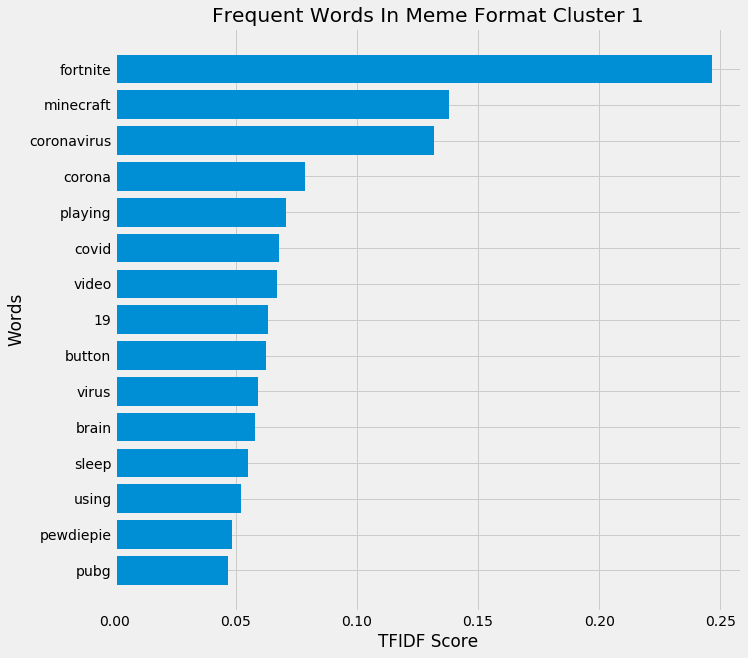

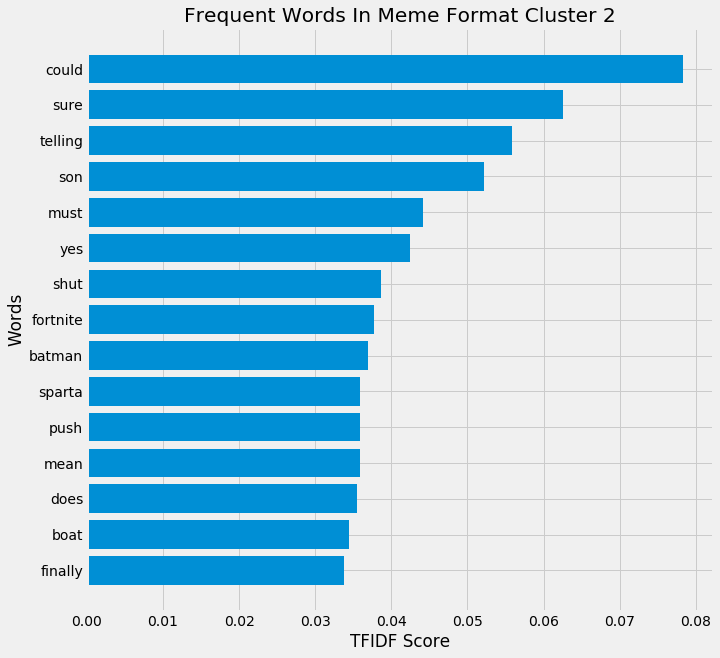

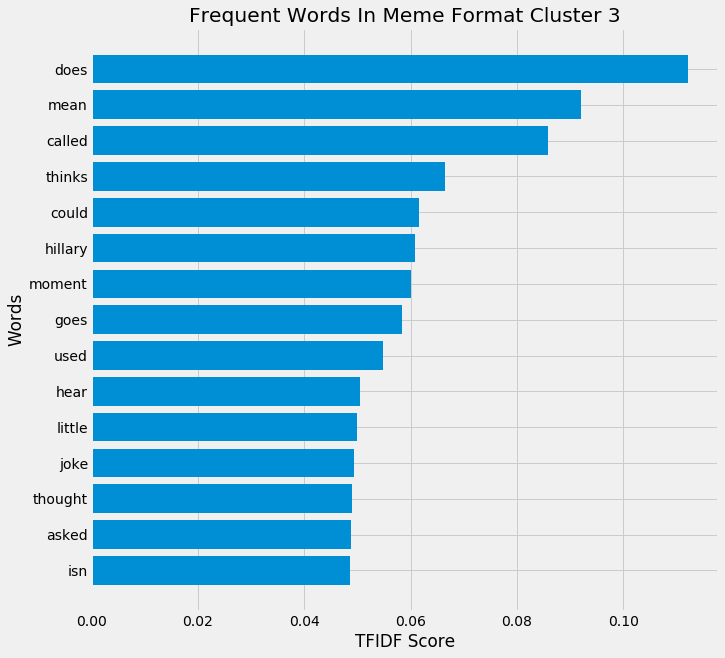

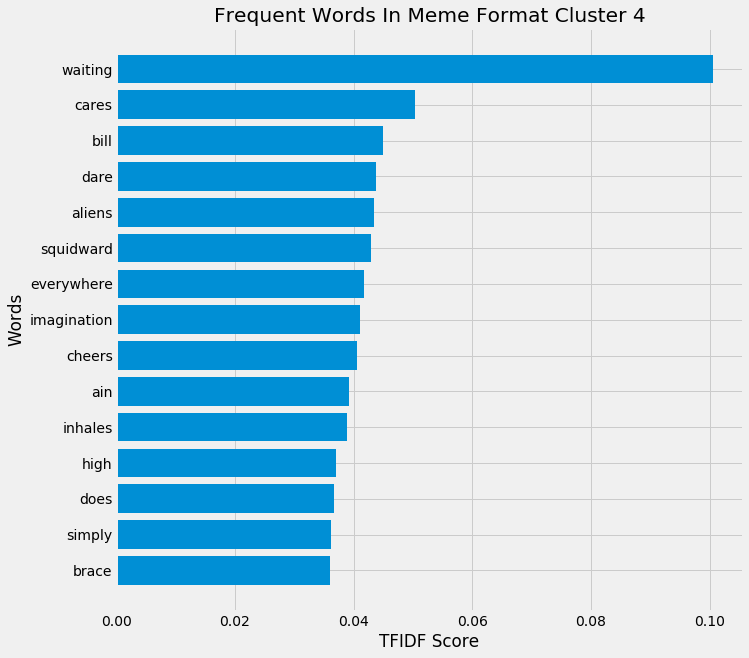

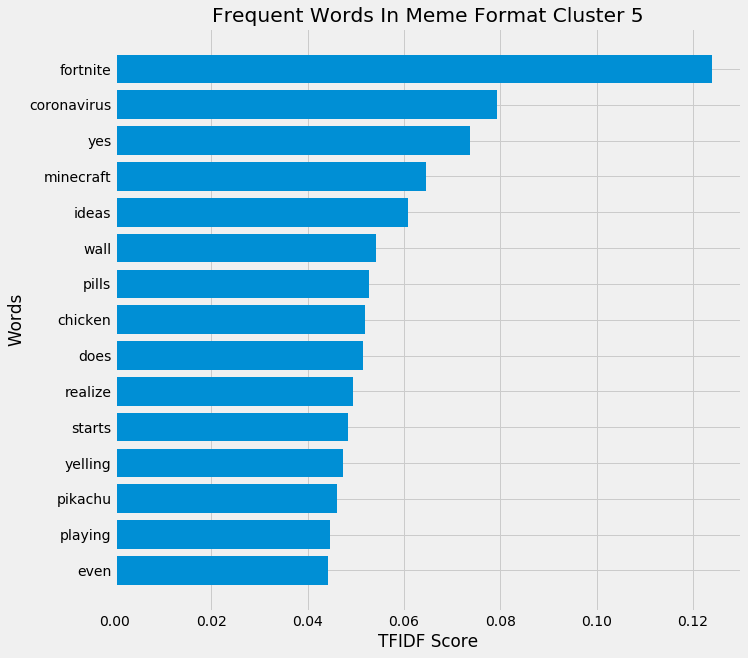

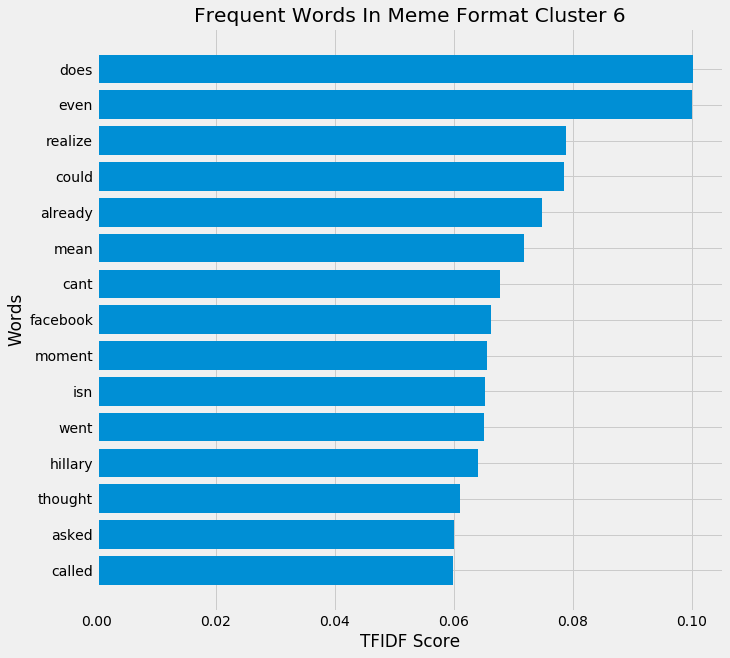

In [128]:
#barplot for each cluster
for i in range(len(dfs)):  
    fig = plt.figure(figsize=(10, 10))
    score = dfs[i]['score'][::-1]
    freqword = dfs[i]["features"][::-1]
    plt.barh(freqword , score)
    plt.title('Frequent Words In Meme Format Cluster ' + str(i+1))
    plt.ylabel("Words")
    plt.xlabel("TFIDF Score")
    plt.show()
    

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Running Model Iteration 600 
Running Model Iteration 700 
Running Model Iteration 800 
Running Model Iteration 900 
Model finished running


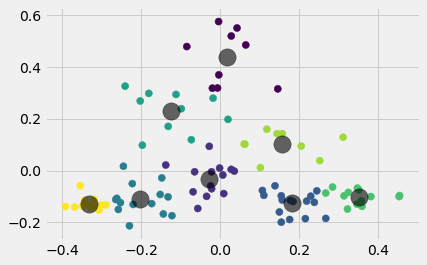

In [129]:
#k=8
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(8, 1, 1000) #KMeans(n_clusters=6, max_iter = 1000) 
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis') #s =50

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [130]:
predicted_values

array([2, 3, 2, 6, 3, 5, 2, 1, 2, 7, 0, 0, 3, 3, 5, 2, 6, 5, 3, 7, 0, 3,
       5, 5, 5, 1, 5, 2, 5, 5, 6, 2, 2, 5, 6, 2, 0, 3, 3, 2, 2, 7, 5, 5,
       6, 7, 3, 4, 0, 1, 5, 1, 1, 6, 2, 3, 6, 0, 0, 6, 3, 2, 7, 1, 7, 0,
       0, 7, 2, 6, 7, 7, 1, 1, 1, 7, 2, 1, 1, 1, 3, 7, 7, 1, 4, 7, 4, 2,
       4, 4, 4, 1, 4, 3, 4, 3, 4, 4, 7])

In [131]:
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 20) #x array, prediction, number of words
dfs

[       features     score
 0      fortnite  0.294513
 1     minecraft  0.175333
 2   coronavirus  0.105648
 3        button  0.098718
 4       playing  0.098316
 5         video  0.089625
 6         brain  0.084248
 7         sleep  0.079136
 8         using  0.077590
 9         covid  0.071840
 10       corona  0.066307
 11           19  0.066133
 12       roblox  0.061577
 13       normal  0.060092
 14        anime  0.059518
 15    butterfly  0.058998
 16         pubg  0.057179
 17         mind  0.051432
 18        virus  0.050815
 19          nut  0.050322,     features     score
 0    telling  0.073229
 1        son  0.067531
 2       must  0.061317
 3        yes  0.058498
 4   fortnite  0.054909
 5     sparta  0.048716
 6       wall  0.048369
 7     batman  0.047670
 8       boat  0.046575
 9       shut  0.045945
 10    trophy  0.042159
 11   finally  0.041857
 12      does  0.038522
 13      vote  0.037097
 14      even  0.036086
 15      mean  0.036035
 16    kermit  0.035757
 

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            


In [ ]:
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 20)

# kmeans demo 3
https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re

#df = pd.read_csv('../input/emails.csv',nrows = 35000)

In [34]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
data = allwords_memeformat


tf_idf_vectorizor = TfidfVectorizer(stop_words=["you", "me", "my", "your","my", "all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

#documents = allwords_memeformat
#vectorizer = TfidfVectorizer(stop_words=["you", "me", "my", "your","my", "all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"] )  #vocabulary = 
#X = vectorizer.fit_transform(documents) 
#text = X

In [35]:
#feature names
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,0000,00000,000000,0000000,00000000,000000000,0000000000,00000000000,...,𝕃𝕠𝕟𝕖𝕝𝕪,𝕃𝕠𝕟𝕘,𝕄𝕚𝕟𝕕,𝕄𝕦𝕤𝕥,𝕊𝕠,𝕋𝕙𝕠𝕦𝕘𝕙𝕥,𝕐𝕠𝕦𝕣,𝕯𝖊𝖆𝖙𝖍,𝖉𝖆𝖗𝖐,𝖒𝖔𝖉𝖊
0,0.003732,0.013641,0.000228,0.0,0.000000,0.000329,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000329,0.0,0.0
1,0.000347,0.001642,0.000153,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000652,0.003731,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.001233,0.002602,0.000000,0.0,0.000000,0.000000,0.000198,0.0,0.000223,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000787,0.001939,0.000000,0.0,0.000241,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [47]:
#elbow method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    sklearn_pca = PCA(n_components = 2)   #educe the dimensionality of our feature matrix to 2D
    Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
    kmeans = KMeans(n_clusters=3, max_iter=1000, algorithm = 'auto')
    Sum_of_squared_distances.append(kmeans.inertia_)

AttributeError: 'KMeans' object has no attribute 'inertia_'

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Cancerlos Elbow Plot')
plt.show()

In [ ]:
#elbow method
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        #sse.append(MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    

In [37]:
#sklearn kmeans 
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [40]:
len(prediction)

99

AttributeError: 'KMeans' object has no attribute 'centroids'

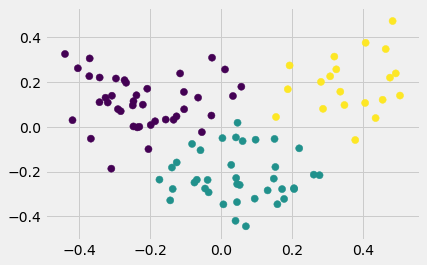

In [44]:
#plot kmeans
sklearn_pca = PCA(n_components = 2)  #n_components
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')   #Kmeans(3, 1, 600)
fitted =  test_e.fit(Y_sklearn)        #test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

#centers = fitted.centroids
#plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [45]:
predicted_values 

array([0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 2,
       1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2], dtype=int32)

In [36]:
#Optimal Number of Clusters: elbow method
number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

NameError: name 'Y_sklearn' is not defined

# kmeans demo 2 with more stop words

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
documents = allwords_memeformat

#vocabuluary 
vectorizer = TfidfVectorizer(stop_words=["you", "me", "my", "your","my", "all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )  #vocabulary = 
#vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
X = vectorizer.fit_transform(documents) 
text = X

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    

In [ ]:
find_optimal_clusters(text, 15)

In [ ]:
k=6
clusters = MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit_predict(text)

In [ ]:
#plot clusters k=6
"""
Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.
"""
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=99, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=99, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [ ]:
#Top Keywords
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 20)

# kmeans demo 2
https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
documents = allwords_memeformat

#vocabuluary 
vectorizer = TfidfVectorizer(stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )  #vocabulary = 
#vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
X = vectorizer.fit_transform(documents) 
text = X

In [24]:
X.toarray().shape

(99, 117027)

In [25]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


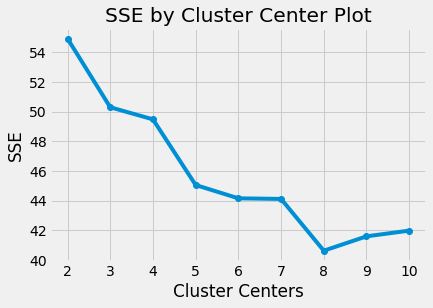

In [35]:
#different parameters
#Finding Optimal number of Clusters k 
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [36]:
k=6
clusters = MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit_predict(text)



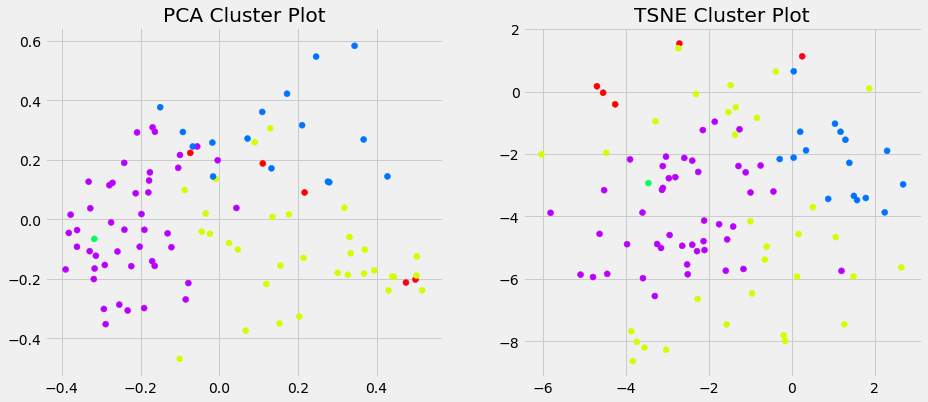

In [37]:
#plot clusters k=6
"""
Here we plot the clusters generated by our KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors. In order to speed up the process with TSNE, I sample from 3,000 documents and perform a PCA 50 dimension reduction on the data first. Next I show a scatterplot further sampling the sample down to 300 points.
"""
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=99, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=99, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    


In [38]:
#Top Keywords
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 20)


Cluster 0
have,until,after,with,get,quarantine,this,like,still,here,ll,your,woof,wait,just,my,me,you,when,waiting

Cluster 1
don,with,they,do,like,have,just,so,but,one,your,me,not,this,we,what,when,if,my,you

Cluster 2
like,meme,see,re,with,but,have,get,people,me,says,about,they,my,someone,your,make,face,when,you

Cluster 3
everyone,one,school,have,get,do,who,no,not,fortnite,meme,people,when,with,memes,this,your,my,you,me

Cluster 4
don,just,can,they,but,with,like,not,do,what,so,this,no,have,get,my,me,your,when,you

Cluster 5
everyone,has,my,meme,one,fo,no,dat,you,he,hey,aint,guy,this,ain,see,time,cares,got,nobody


In [39]:
k=8
clusters = MiniBatchKMeans(n_clusters=k, batch_size=k*20).fit_predict(text)


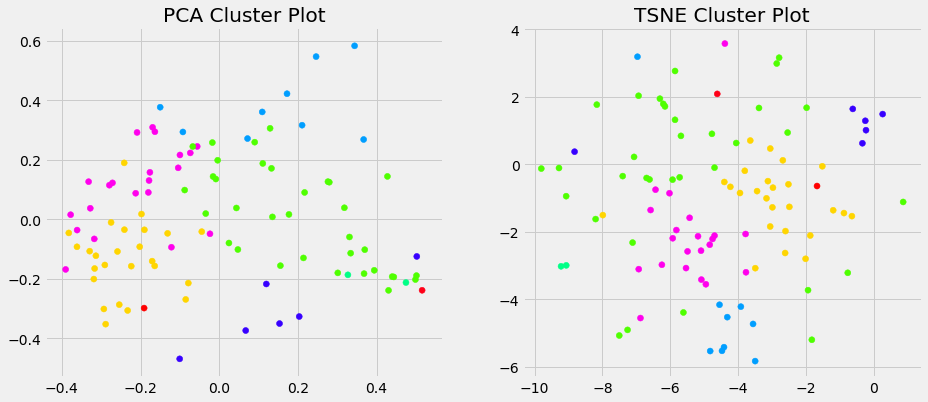

In [40]:
plot_tsne_pca(text, clusters)

In [41]:
get_top_keywords(text, clusters, vectorizer.get_feature_names(), 30)


Cluster 0
if,they,with,an,claimed,proves,we,re,lieslies,claim,but,when,father,were,my,have,this,determines,test,says,fact,say,not,results,said,your,detector,determined,lie,you

Cluster 1
because,people,why,he,will,how,we,re,want,they,but,don,with,like,if,this,no,just,can,what,do,not,have,when,so,get,my,me,your,you

Cluster 2
they,see,up,make,who,an,can,don,people,get,what,do,just,have,so,like,meme,we,but,not,memes,with,one,no,your,this,when,me,my,you

Cluster 3
but,some,get,do,meme,no,powdered,have,like,ya,ll,me,my,fo,your,when,memes,those,dat,anymore,aint,yall,you,them,ain,more,any,nobody,time,got

Cluster 4
being,why,fortnite,don,life,up,coronavirus,good,meme,school,stop,now,else,who,have,get,no,not,this,with,look,do,memes,people,everyone,when,your,my,you,me

Cluster 5
so,with,but,me,why,do,can,people,have,one,we,they,your,had,put,sure,could,just,when,where,told,great,or,this,not,my,would,what,you,if

Cluster 6
he,up,one,someone,people,don,meme,make,not,we,can,do,no,so,just,out,what

# Kmeans  demo 1
https://pythonprogramminglanguage.com/kmeans-text-clustering/

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
documents = allwords_memeformat

In [ ]:
#vocabulary set parameter of TfidfVectorizer: every word in all of meme formats

vectorizer = TfidfVectorizer(stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"], )  #vocabulary = 
#vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was", "on", "it", "be"]).fit(corpus)
X = vectorizer.fit_transform(documents) 

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

In [ ]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
print("\n")
print("Prediction")

In [ ]:
Y = vectorizer.transform(["me waiting you everyone wait"])
prediction = model.predict(Y)
print(prediction)

# CountVecotrizer

In [ ]:
cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
count_vector=cv.fit_transform(allwords_memeformat)

In [ ]:
cv.vocabulary_

In [ ]:
cv.vocabulary_[0]

In [ ]:
count_vector.shape
wordcount = count_vector.toarray()
wordcount 

In [ ]:
wordcount2 = np.array(wordcount[0])
wordcount2.shape

In [ ]:
frequent_index = np.argpartition(wordcount2, -10)[-10:]
frequent_index

# get top n words

In [ ]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
   # cv = CountVectorizer(allwords_memeformat, stop_words=["all","in","the","is", "and", "a", "to", "at"])
   # vec = CountVectorizer().fit(corpus)
    vec = CountVectorizer( stop_words=["all","in","the","is", "and", "a", "to", "at", "for", "that", "of", "are", "was"]).fit(corpus)
   
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#'Woman-Yelling-At-Cat.json',
common_words = get_top_n_words(allwords_memeformat, 20)
for word, freq in common_words:
    print(word, freq)

In [ ]:
# making X and y for RNN
word = []
y = []
for i in range(len(memes_data)):
    #print("This is i: " + str(i))
    for ele in memes_data[i]:
        y.append(i) 

        box = ele['boxes']
        parsedtext = parse_blocks(box)
        
        #appen all words in a box as to array2
        array2 = []
        for box_element in parsedtext:
            for box_word in box_element:
                array2.append(box_word)
        print(array2)        
        
        #each element in wordcontains all words of a box    
        word.append(array2)

X_words = word
print(word)
print(y) 

In [ ]:
X_words[0]

In [ ]:
len(y)

In [ ]:
len(X_words)

In [ ]:
yset = set(y)
yset

# Visualization

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

categoryx = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
#categoryx = ['ARTHROPOD-BORNE VIRAL DISEASES', 'MALIGNANT NEOPLASM', 'MALIGNANT NEOPLASM OF RESPIRATORY SYSTEM', '20', '15']
fractiony = [32141/575948, 26186/575948, 19971/575948, 18164/575948, 17325/575948, 17272/575948, 15850/575948, 14802/575948, 13194/575948, 12985/575948]  # calcaulate
ax.bar(categoryx,fractiony)

plt.title('Top 10 Most Common Meme Formats')
plt.ylabel("Meme Format Frequency")
plt.xlabel("Meme Format")
plt.show()
#  "total": 575948,